In [1]:
%matplotlib inline
from ipywidgets import interactive
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt

In [2]:
import imp
import os
MODULE = 'D:/Git/invprob'
TEST = 'D:/Git/invprob/notebook' # beware the \t ....
def goto(string):
    os.chdir(string)
goto(TEST)

In [50]:
goto(MODULE)
import invprob.optim
_ = imp.reload(invprob.optim)
import invprob.sparse as sparse
_ = imp.reload(invprob.sparse)
import invprob
_ = imp.reload(invprob)

from invprob.optim import fb_lasso, cp_lasso
goto(TEST)

In [4]:
np.random.seed(seed=0)  # Seed for np.random
dpi = 100  # Resolution for plotting (230 for small screen, 100 for large one)
_ = plt.ion()
folder = "scripts/../output/L1_reg/"

In [5]:
# We start by defining the characteristics of the problem
data_size = 100
data_number = round(data_size / 2)
sparsity_level = 10

In [34]:
# We define the main components of our problem
Phi = np.random.randn(data_number, data_size)
x0 = np.sign(sparse.randn(data_size, 1, sparsity_level))
noisy_vector = np.random.randn(data_number, 1)
noise_level = 0.1

## 1. Iterative regularization with the diagonal Forward-Backward algorithm



### a) The diagonal Forward-Backward algorithm

In [7]:
# We solve the noiseless problem with a diagonal FB
y = Phi@x0 + 0 * noisy_vector
iter_nb = 10000
exp_decay = 0.1  # The smaller the exponent, the faster is the algorithm
reg_param_grid = 1 / (np.arange(iter_nb)+1)**exp_decay
x_sol = fb_lasso(Phi, y, reg_param_grid, iter_nb, verbose=False)

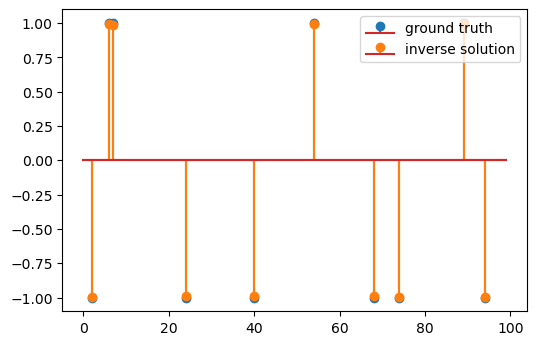

In [8]:
_ = plt.figure(dpi=dpi)
sparse.stem(x0, "C0", "ground truth")
sparse.stem(x_sol, "C1", "inverse solution")

### b) The diagonal FB applied to the noisy problem

In [35]:
# We solve the noisy problem
y = Phi@x0 + noise_level * noisy_vector
iter_nb = 10000
exp_decay = 1  # The smaller the exponent, the faster is the algorithm
reg_param_grid = 1 / (np.arange(iter_nb)+1)**exp_decay

x_sol_noisy, details_noisy = fb_lasso(Phi, y, reg_param_grid, iter_nb, verbose=True)
# x_reg2 = fb_lasso(Phi, y, 0.87, iter_nb=200)

In [36]:
# Let's compare it with the solution obtain with Tikhonov regularization
x_reg_tikhonov = fb_lasso(Phi, y, 0.87, iter_nb=10000)

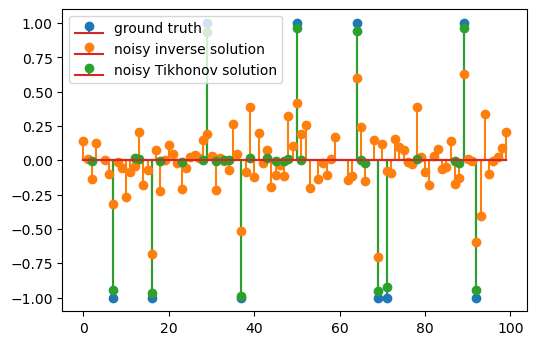

In [38]:
# We obtain a solution which is not satisfying, and much worse than the regularized one
_ = plt.figure(dpi=dpi)
sparse.stem(x0, "C0", "ground truth")
sparse.stem(x_sol_noisy, "C1", "noisy inverse solution")
sparse.stem(x_reg_tikhonov, "C2", "noisy Tikhonov solution")

### c) The algorithm is a regularization path

In [39]:
reg_path = details_noisy["iterate_path"]

In [40]:
def reg_param_selection(path, ground_truth):
    '''Given a regularization path and a ground truth,
    returns the best regularized solution (in L2 sense)
    '''
    path_length = path.shape[1]
    reg_sol = path[:, 0, None]
    reg_param_index = 0
    for k in np.arange(path_length):
        if la.norm(ground_truth - path[:, k, None]) \
                < la.norm(ground_truth - reg_sol):
            reg_sol = path[:, k, None]
            reg_param_index = k
    return reg_sol, reg_param_index

In [41]:
x_reg, reg_param_index = reg_param_selection(reg_path, x0)
reg_param_index

9999

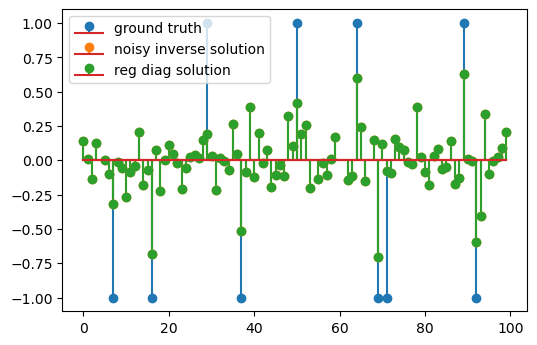

In [42]:
_ = plt.figure(dpi=dpi)
sparse.stem(x0, "C0", "ground truth")
sparse.stem(x_sol_noisy, "C1", "noisy inverse solution")
sparse.stem(x_reg, "C2", "reg diag solution")

In [43]:
def get_pca_projector(data):
    ''' Given a set of data points (stored in columns of a 2D np.array)
    returns the projection matrix corresponding to the 2 more relevant
    directions
    '''
    centered_points = data - np.mean(data, axis=1).reshape(data.shape[0], 1)
    V = np.cov(centered_points)
    _, vectors = la.eig(V)
    return np.real(vectors[:, 0:2]).T


def scatter_reg_path(path, limit=None, title=None):
    ''' Given a 2D path, plots it using scatter
    '''
    cm = plt.cm.get_cmap('RdBu')
    if limit is not None:
        plt.scatter(limit[0, :], limit[1, :], c='r', marker='x', s=150)
    if title is not None:
        _ = plt.title(title)
    plt.plot(path[0, :], path[1, :], c='black', linewidth=0.5)
    fig = plt.scatter(path[0, :], path[1, :], c=range(path.shape[1]),
                      vmin=0, vmax=path.shape[1], s=35, cmap=cm)
    plt.colorbar(fig)

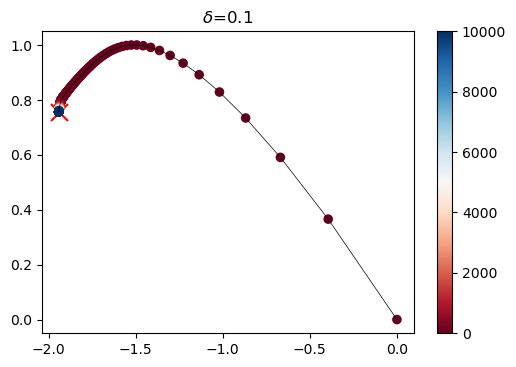

In [46]:
_ = plt.figure(dpi=dpi)
P_svd = get_pca_projector(reg_path)
scatter_reg_path(P_svd@reg_path, title=f"$\delta$={noise_level}", limit=P_svd@x_sol_noisy)

In [23]:
a=12

In [31]:
print(f"a={a}")

a=12


In [32]:
delta

NameError: name 'delta' is not defined